# Data Stock

In [1]:
name = 'CTG'
data_path = f"C:\\Users\\Admin\\Desktop\\Code\\Vietnamese_stock_prediction-main\\data\\processed\\{name}.csv"

In [2]:
import os
import pandas as pd

In [3]:
df = pd.read_csv(data_path, index_col=0)
df = df.drop('date', axis=1)
# df.to_csv(f"{name}.csv", index=False)

In [4]:
df.to_dict(orient='records')

[{'open': 25.0, 'close': 24.8, 'high': 25.15, 'low': 24.6, 'low_2': 24.65},
 {'open': 24.8, 'close': 24.85, 'high': 25.15, 'low': 24.75, 'low_2': 24.8},
 {'open': 24.85, 'close': 24.9, 'high': 25.05, 'low': 24.8, 'low_2': 24.85},
 {'open': 24.9, 'close': 24.1, 'high': 25.0, 'low': 23.5, 'low_2': 23.55},
 {'open': 24.15, 'close': 23.9, 'high': 24.15, 'low': 23.7, 'low_2': 23.75},
 {'open': 25.0, 'close': 25.25, 'high': 25.35, 'low': 24.5, 'low_2': 24.55},
 {'open': 25.2, 'close': 24.9, 'high': 25.25, 'low': 24.8, 'low_2': 24.85},
 {'open': 24.95, 'close': 25.05, 'high': 25.1, 'low': 24.95, 'low_2': 25.0},
 {'open': 25.05, 'close': 24.85, 'high': 25.1, 'low': 24.55, 'low_2': 24.6},
 {'open': 24.85, 'close': 24.55, 'high': 25.1, 'low': 24.55, 'low_2': 24.7},
 {'open': 24.4, 'close': 24.8, 'high': 24.9, 'low': 24.4, 'low_2': 24.55},
 {'open': 24.8, 'close': 25.1, 'high': 25.3, 'low': 24.75, 'low_2': 24.8},
 {'open': 25.05, 'close': 25.15, 'high': 25.2, 'low': 25.05, 'low_2': 25.1},
 {'open

In [33]:
ctg_path = f"C:\\Users\\Admin\\Desktop\\Code\\Vietnamese_stock_prediction-main\\src\\notebooks\\{name}.csv"

In [34]:
from river import stream
dataset = stream.iter_csv(
    data_path,
    converters={
        'open': float,
        'close': float,
        'high': float,
        'low': float,
        'low_2': float,
    },
    target='low',
)
X, y = next(dataset)
X, y

({'': '0',
  'date': '2022-05-13 09:00:00',
  'open': 25.0,
  'close': 24.8,
  'high': 25.15,
  'low_2': 24.65},
 24.6)

In [35]:
# Test
from river import metrics
from river import neighbors

model = neighbors.KNNRegressor()
metric = metrics.MAE()

dates_history = []
y_trues = []
y_preds = []

for X, y in dataset:
    dates_history.append(pd.to_datetime(X['date']))
    # Remove the '' and 'date' files from training data
    X.pop('')
    X.pop('date')
    y_pred = model.predict_one(X)
    metric = metric.update(y, y_pred)
    model = model.learn_one(X, y)

    y_trues.append(y)
    y_preds.append(y_pred)
    
metric

MAE: 0.115298

In [38]:
len(y_trues), len(y_preds)

(1066, 1066)

In [37]:
len(dates_history)

1066

In [7]:
from river import metrics
from river import neighbors

model = neighbors.KNNRegressor()
metric = metrics.MAE()
metric_history = []
ys = []
y_preds = []

for X, y in dataset:
    y_pred = model.predict_one(X)
    ys.append(y)
    y_preds.append(y_pred)
    metric = metric.update(y, y_pred)
    
    metric_history.append(metric.get())
    model = model.learn_one(X,  y)

metric

MAE: 0.115288

In [8]:
dataset

<generator object iter_csv at 0x0000021244220740>

In [9]:
metric_history

[24.75,
 12.4,
 8.691666666666666,
 6.68125,
 5.407500000000001,
 4.597916666666667,
 4.0096428571428575,
 3.5346875000000004,
 3.166388888888889,
 2.8817500000000003,
 2.623409090909091,
 2.424791666666667,
 2.2605769230769237,
 2.1969642857142864,
 2.127833333333334,
 2.069843750000001,
 1.9992647058823538,
 1.9120833333333342,
 1.8151315789473692,
 1.7443750000000007,
 1.668928571428572,
 1.6003409090909095,
 1.5351086956521742,
 1.4778125000000002,
 1.4191,
 1.3752884615384615,
 1.329537037037037,
 1.2838392857142855,
 1.2406034482758619,
 1.2025833333333331,
 1.1715322580645158,
 1.1386718749999998,
 1.1071969696969695,
 1.0758088235294114,
 1.0476428571428569,
 1.0229861111111107,
 0.9961486486486483,
 0.9717763157894733,
 0.9473717948717946,
 0.9244374999999997,
 0.9028658536585362,
 0.882083333333333,
 0.8627325581395345,
 0.845397727272727,
 0.8274999999999998,
 0.8121195652173911,
 0.7952659574468084,
 0.7805729166666665,
 0.7652551020408161,
 0.7501499999999998,
 0.736029411

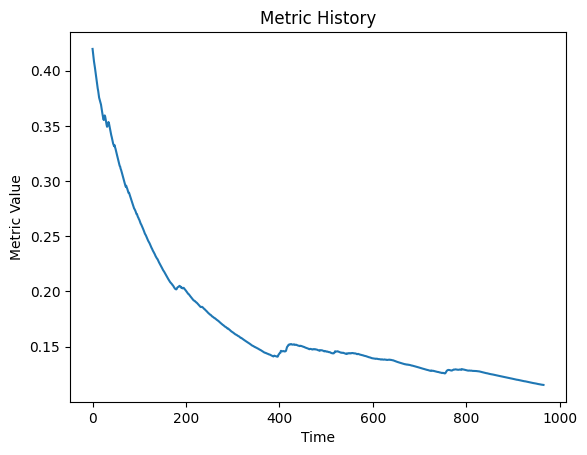

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(len(metric_history[100:])), metric_history[100:])
plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.title('Metric History')
plt.show()

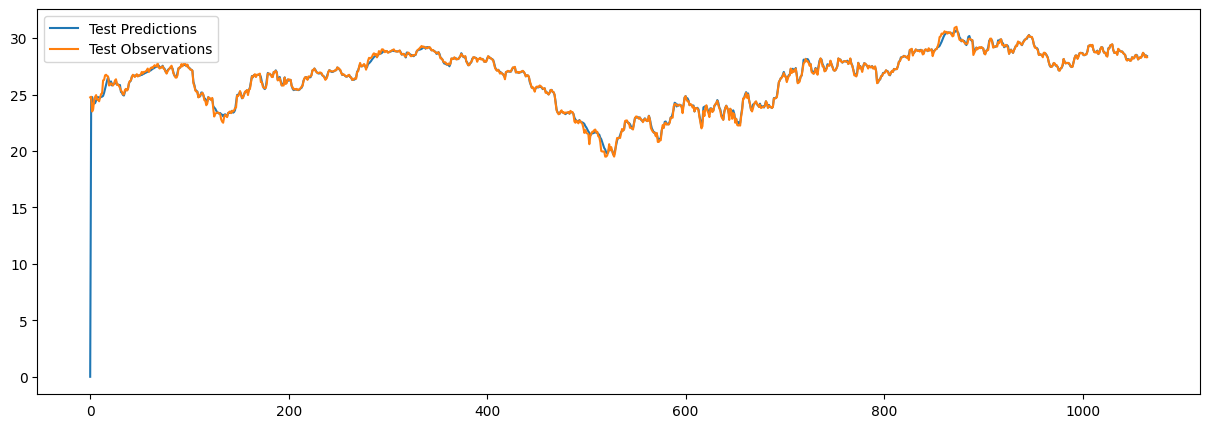

In [115]:
import matplotlib.pyplot as plt

# test_predictions = model.predict(X_test).flatten()

# Plot test prediction
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(y_preds)
plt.plot(ys)
plt.legend(['Test Predictions', 'Test Observations'])

plt.show()

In [119]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ys[-105:], y_preds[-105:])

0.03161904761904766